# Projekt - Analiza cen wynajmu z serwisu AirBnb w Nowym Jorku w 2019r.

Link do zbioru danych:

https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data?resource=down

Skład Grupy

- Paweł Wira 245725
- Krystian Gumuliński 250625
- Konrad Woźniak 232576

## Czym jest AirBnb?

AirBnb to serwis internetowy mający swoją siedzibę w San Francisco, w Kalifornii, który umożliwia wynajem lokali od osób prywatnych. Platforma powstała w 2008 roku przez Braiana Chesky'ego, Nathana Blecharczyka i Joe Gebbia. Portal Airbnb zrzesza miliony osób, chcące wynająć swoje domy. Aktualnie serwis obejmuje ponad 81000 miast z 191 różnych krajów na świecie. AirBnb jest skrótem od AirBedandBreakfast.com.

Polityka przedsiębiorstwa jest uważana przez niektóre grupy za dość kontrowersyjną. Firma była krytykowana przez osoby najmujące za umożliwienie wynajmującym użytkownikom podwyżek czynszów za domy. Konkuruje też bezpośrednio z branżą hotelarską, która zarzuca firmie brak regulacji prawnych. Część hoteli jednak uległa i wystawiła swoje ogłoszenia na platformie, która pobiera opłaty za wystawione oferty mieszkaniowe.

## Cel projektu

Celem projektu jest analiza zbioru danych, w którym znajdują się dane ofert z serwisu Airbnb dla miasta Nowy Jork z roku 2019. Analiza dotyczy zjawisk takich jak korelacja między cenami, standardem mieszkaniowym czy lokalizacją w odległości od najatrakcyjniejszych miejsc miasta. Dodatkowo dotyczy także zależności pomiędzy osobami wynajmującymi dużą liczbę mieszkań a osobami prywatnymi. Po wykonanej analizie zbioru związanego z AirBnb chcielibyśmy, dokonać pobrania danych związanych z przestępcząścią w Nowym Jorku i dokonać sprawdzenia czy ów problem koreluje z parametrami ogłoszeń.

## Zbiór danych użyty w projekcie

Zbiór danych potrzebny do realizacji projektu został pobrany z serwisu kaggle.com i został zaczerpnięty ze strony insideairbnb.com. 

Dane zawierają informację między innymi o lokalizacji i dzielnicach ogłoszeń, o cenach, rodzajach mieszkań czy też ilości dostępnych dni w roku. Zbiór danych może pomóc wskazać cechy osób wynajmujących i obszarów wynajmu oraz jest stworzony z myślą o przyszłych prognozach obrazujących preferencje wynajmu klientów w stosunku do poszczególnych okręgów.

## Podział Administacyjny Nowy Jork

Nowy Jork dzieli się na pięć okręgów, określanych mianem boroughs. Każdy z nich pokrywa się z odpowiednim hrabstwem stanu Nowy Jork. Na terenie pięciu okręgów wyróżnić można setki mniejszych dzielnic, z których wiele posiada własną historię i specyfikę. Jeśli każde z boroughs byłoby niezależnym miastem, cztery z nich (Brooklyn, Queens, Manhattan i Bronx) należałyby do najludniejszych miast w Stanach Zjednoczonych.

- Manhattan (hrabstwo Nowy Jork; populacja w 2019 roku: 1 628 706) – najgęściej zaludniona dzielnica; na jej terenie znajduje się Central Park, World Trade Center i większość nowojorskich wieżowców, stanowi finansowe centrum miasta i siedzibę wielu korporacji, kwatery głównej ONZ, kilku uniwersytetów i licznych kulturowych atrakcji.

- Bronx (hrabstwo Bronx; populacja w 2019 roku: 1 418 207) – najdalej na północ wysunięty okręg Nowego Jorku, siedziba Yankee Stadium (domowego stadionu drużyny New York Yankees) i największej spółdzielni mieszkaniowej w Stanach Zjednoczonych – Co-op City.

- Brooklyn (hrabstwo Kings; populacja w 2019 roku: 2 559 903) – położony w zachodniej części Long Island, najbardziej zaludniony ze wszystkich boroughs; niezależne miasto do 1898 roku. Brooklyn znany jest ze swojej kulturowej, społecznej i etnicznej różnorodności, niezależnej sceny artystycznej, specyfiki poszczególnych dzielnic oraz wyjątkowego zróżnicowania architektonicznego.

- Queens (hrabstwo Queens; populacja w 2019 roku: 2 253 858) – terytorialnie największy borough i najbardziej zróżnicowane etnicznie hrabstwo w Stanach Zjednoczonych. W odróżnieniu jednak od Nowego Jorku, Brooklynu i Bronxu, Queens nie ma statusu odrębnego City. Powstałe z kilkunastu małych miasteczek i wiosek założonych przez Holendrów, obecnie Queens stanowi przede wszystkim obszar mieszkalny dla przedstawicieli klasy średniej.

- Staten Island (hrabstwo Richmond; populacja w 2019 roku: 476 143) – ma najbardziej podmiejski charakter spośród wszystkich pięciu dzielnic Nowego Jorku. Staten Island połączona jest z Brooklynem przez Verrazano-Narrows Bridge, zaś z Manhattanem przez darmowy prom Staten Island Ferry. Staten Island Ferry jest jedną z najpopularniejszych atrakcji turystycznych w Nowym Jorku, jako że zapewnia widok na Statuę Wolności, Wyspę Ellis i dolny Manhattan.

![](img/picture.jpg)

# Implementacja

## Import niezbędnych bilbiotek

Podczas implementacji należy zaimportować odpowiednie biblioteki umożliwiające dalszą pracę przy analizy danych. Zaimportowane zostały podstawowe biblioteki języka Python takie jak np. biblioteka umożliwiająca obliczenia na macierzach, biblioteka pomagająca analizie danych czy biblioteka wizualizacyjna wyniki na wykresach.

In [5]:
#Import niezbędnych bibliotek
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import folium.plugins
import warnings
from sklearn import preprocessing, model_selection
from sklearn.neighbors import KNeighborsClassifier

warnings.filterwarnings('ignore')

## Wczytywanie danych

Pierwszym krokiem realizacji projektu analizy wynajmu mieszkań na podstawie serwisu AirBnb jest zrozumienie danych i wartości występujących w poszczególnych komórkach. Poniżej można zaobsersować rodzaj informacji i jej poszczególny typ.

!!! Zamienić last_review z objektu na wartość numeryczną / Paweł

In [6]:
df = pd.read_csv("data/AB_NYC_2019.csv")
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Opis kolumn:
- name - Nazwa obiektu 
- host_id - Numer identyfikacyjny wystawiającego ogłoszenie 
- neighbourhood_group - Nazwa okręgu w Nowym Jorku 
- neighbourhood - Nazwa dzielnic w danym okręgu w Nowym Jorku 
- latitude - Szerokość geograficzna longitude - Długość geograficzna
- room_type - Typ wynajmowanego obiektu 
- price - Cena 
- minimum_nights - Minimalna ilość nocy dla danego obiektu, które są określone przez wynajmującego 
- number_of_reviews - Ilość recenzji danego obiektu 
- reviews_per_month - Ilość recenzji danego obiektu przez miesiąc
- calculated_host_listing_count - Ilość wystawionych obiektów na wynajem przez tego użytkownika serwisu 
- availability_365 - Ilość dni w których dany obiekt jest dostępny do wynajęcia

In [7]:
# Ilość wierszy
len(df)

48895

Zbiór danych składa się z 16 kolumn i 48895 wierszy, który zostanie wykorzystany do dalszej eksploracji.

In [8]:
# Wyświetlenie pierwszych 3 wierszy
df["price_per_night"] = df.apply(lambda row: int(row.price/row.minimum_nights), axis=1)
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_per_night
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,149
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,225
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,50
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,89
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,8


In [9]:
n_df = df[['neighbourhood_group', 'price_per_night', 'room_type']]
n_df_Brooklyn = n_df[n_df['neighbourhood_group'] == 'Brooklyn'].reset_index(drop=True)
n_df_Manhattan = n_df[n_df['neighbourhood_group'] == 'Manhattan'].reset_index(drop=True) 
n_df_Queens = n_df[n_df['neighbourhood_group'] == 'Queens'].reset_index(drop=True) 
n_df_Staten_Island = n_df[n_df['neighbourhood_group'] == 'Staten Island'].reset_index(drop=True) 
n_df_Bronx = n_df[n_df['neighbourhood_group'] == 'Bronx'].reset_index(drop=True) 

In [10]:
#wszystkie ofarty dzielnic w danym okręgu
d_df = df[['neighbourhood_group' ,'neighbourhood', 'price_per_night' , 'room_type']]
d_df_Brooklyn = d_df[d_df['neighbourhood_group'] == 'Brooklyn'].reset_index(drop=True) 
d_df_Manhattan = d_df[d_df['neighbourhood_group'] == 'Manhattan'].reset_index(drop=True)
d_df_Queens = d_df[d_df['neighbourhood_group'] == 'Queens'].reset_index(drop=True)
d_df_Staten_Island = d_df[d_df['neighbourhood_group'] == 'Staten Island'].reset_index(drop=True)
d_df_Bronx = d_df[d_df['neighbourhood_group'] == 'Bronx'].reset_index(drop=True)

#nazwy wszystkich dzielnic w okręgu
dd_df_Brooklyn = d_df_Brooklyn['neighbourhood'].drop_duplicates()
dd_df_Manhattan = d_df_Manhattan['neighbourhood'].drop_duplicates()
dd_df_Queens = d_df_Queens['neighbourhood'].drop_duplicates()
dd_df_Staten_Island = d_df_Staten_Island['neighbourhood'].drop_duplicates()
dd_df_Bronx = d_df_Bronx['neighbourhood'].drop_duplicates()


# Transformacja i czyszczenie danych

Proces transformacji i czyszczenia danych składa się z wszelkich operacji, które dostosują treść i format danych do naszych potrzeb. Dla naszego zbioru danych na samym wstępie dokonamy sprawdzenia, czy w zbiorze występują puste rubryki.

In [11]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
price_per_night                       0
dtype: int64

Następnym krokiem jest sprawdzenie czy dany wiersz jest powielany w zbiorze

In [12]:
df.duplicated().sum()

0

Dokonujemy zastąpienia wartości null w kolumnie reviews_per_month liczbą 0, gdyż wartość null została zapisana w wyniku braku wyświetleń

In [13]:
df.fillna({'reviews_per_month':0}, inplace=True)

Dla wierszy gdzie kolumna name nie ma wartości dajemu NONE

In [14]:
df.fillna({'name':'NONE'}, inplace=True)

In [15]:
df['last_review'] = pd.to_datetime(df['last_review'])
df.fillna({'last_review':np.datetime64('1990-01-01')}, inplace=True)

W zbiorze danych występują kolumny, które są nam zbędne w procesie analizy danych:

Kolumny do usunięcia:

- id - czyli unikalny numer dla danego ogłoszenia,
- host_name - imię osoby wystawiającej, które jest równoważne z tabelą host_id
- last_review - informacja, która nie będzie przydatna w procesie analizy

In [16]:
df.drop(['id','host_name'], axis=1, inplace=True)

!!! Nie wyrzucamy last_review/ Paweł

Ostatnim krokiem jest ponowne sprawdzenie czy w zbiorze występują jeszcze puste rubryki, które mogą negatywnie wpływać na proces analizowania poszczególnych danych

In [17]:
df.isnull().sum()

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price_per_night                   0
dtype: int64

In [18]:
df.dtypes

name                                      object
host_id                                    int64
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
price_per_night                            int64
dtype: object

# Eksploracja i Wizualizacja danych

Najpierw zamieniamy typy danych ze String na int poprzez wykorzystanie LabelEncoder

In [19]:
le = preprocessing.LabelEncoder()
hrabstwo = le.fit_transform(df["neighbourhood_group"])
hrabstwo_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
hrabstwo_mapping_reversed = {v: k for k, v in hrabstwo_mapping.items()}
print(hrabstwo_mapping)

{'Bronx': 0, 'Brooklyn': 1, 'Manhattan': 2, 'Queens': 3, 'Staten Island': 4}


In [20]:
dzielnica = le.fit_transform(list(df["neighbourhood"]))
dzielnica_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
dzielnica_mapping_reversed = {v: k for k, v in dzielnica_mapping.items()}

df = df[df["price"] >= 30]
#print(dzielnica_mapping)

Pierwszym krokiem badania naszego zbioru danych jest wyświetlenie macierzy korelacji, która umożliwia nam określenie w jakim stopniu poszczególne cechy są ze sobą powiązane

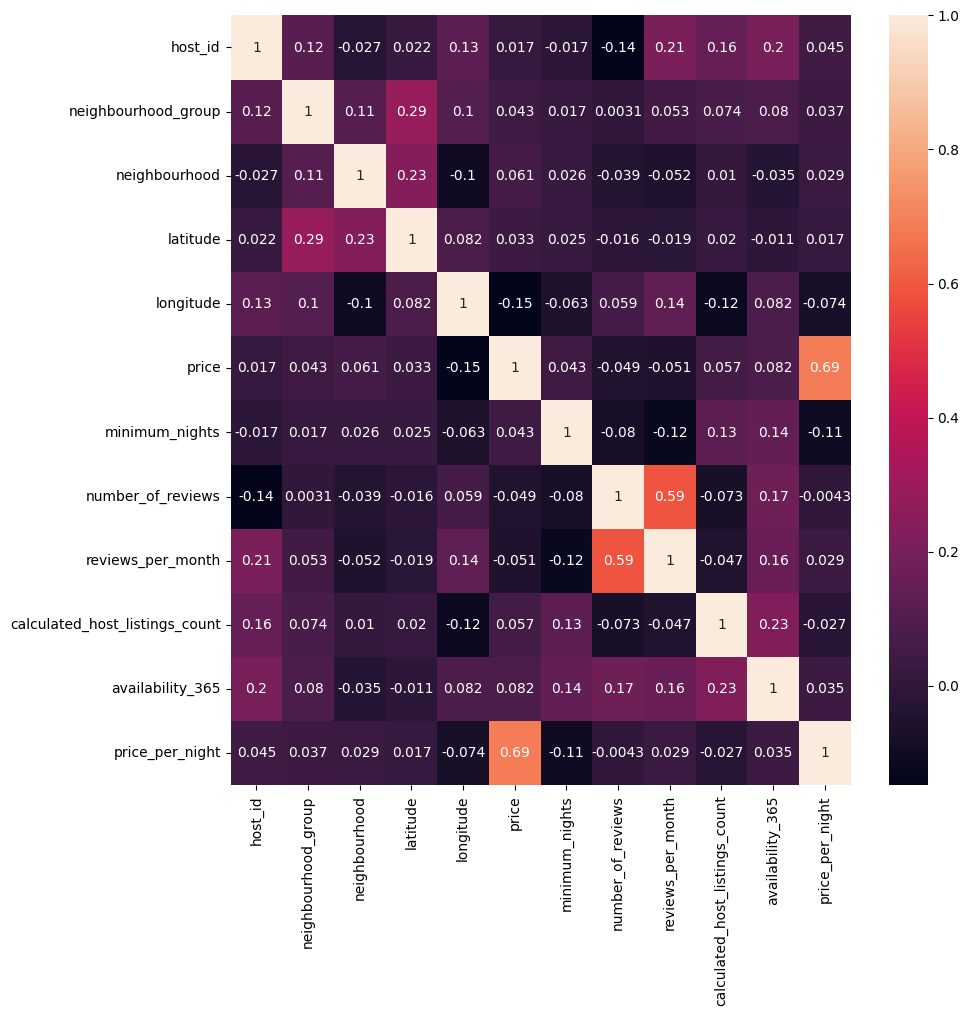

In [21]:
df["neighbourhood"] = df["neighbourhood"].map(dzielnica_mapping)
df["neighbourhood_group"] = df["neighbourhood_group"].map(hrabstwo_mapping)

plt.figure(figsize=(10,10))
ax = sns.heatmap(df.corr(),annot=True)

Z powyższe mapy cieplnej wnioskujemy, że poszczególne dane nie są ze sobą powiązane w dużym stopniu oprócz, możemy wyróżnić następującą korelacje:

- reviews_per_month/number_of_reviews - wysoki współczynnik jest wynikiem skalowania drugiej wartośći przez ilość miesięcy w którcyh oogłoszenie było aktywne

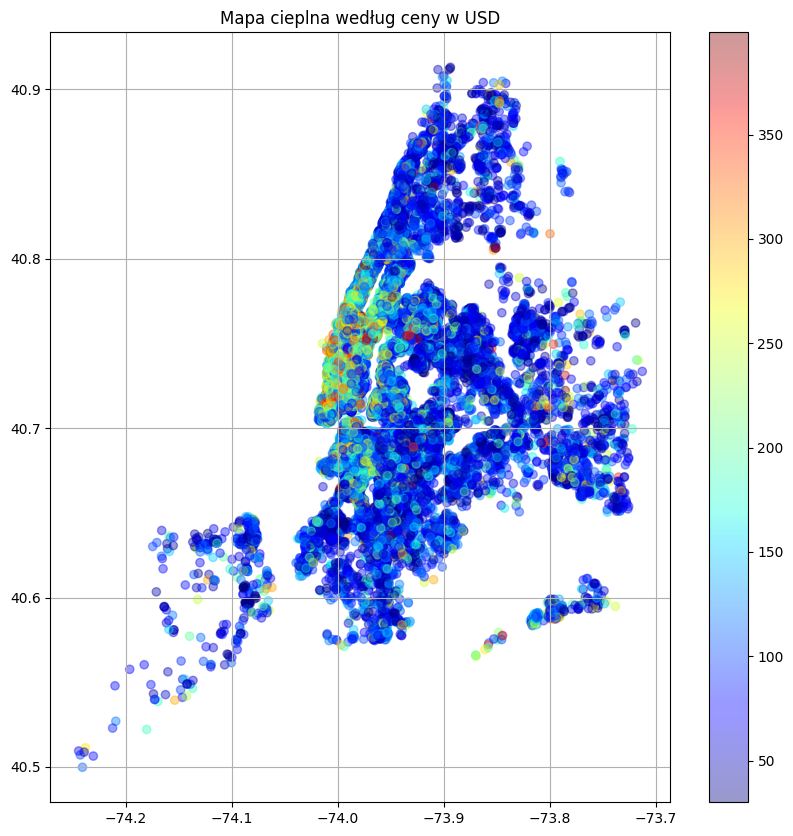

In [22]:

FILTER_PRICE_VALUE = 400
sub_airbnb = df[df.price < FILTER_PRICE_VALUE]
fig, ax = plt.subplots(figsize=(10, 10))
cmap = plt.get_cmap('jet')
c = sub_airbnb.price 
alpha = 0.5 
label = "airbnb"
price_heatmap = ax.scatter(sub_airbnb.longitude, sub_airbnb.latitude, label=label, c=c,
 cmap=cmap, alpha=0.4)
plt.title("Mapa cieplna według ceny w USD")
plt.colorbar(price_heatmap)
plt.grid(True)
plt.show()


Powyższa mapa cieplna obrazuje nam, że w okręgu Mangattan znajdują się najdroższe ogłoszenia, a w okręgu Staten Island jest ich najmniej

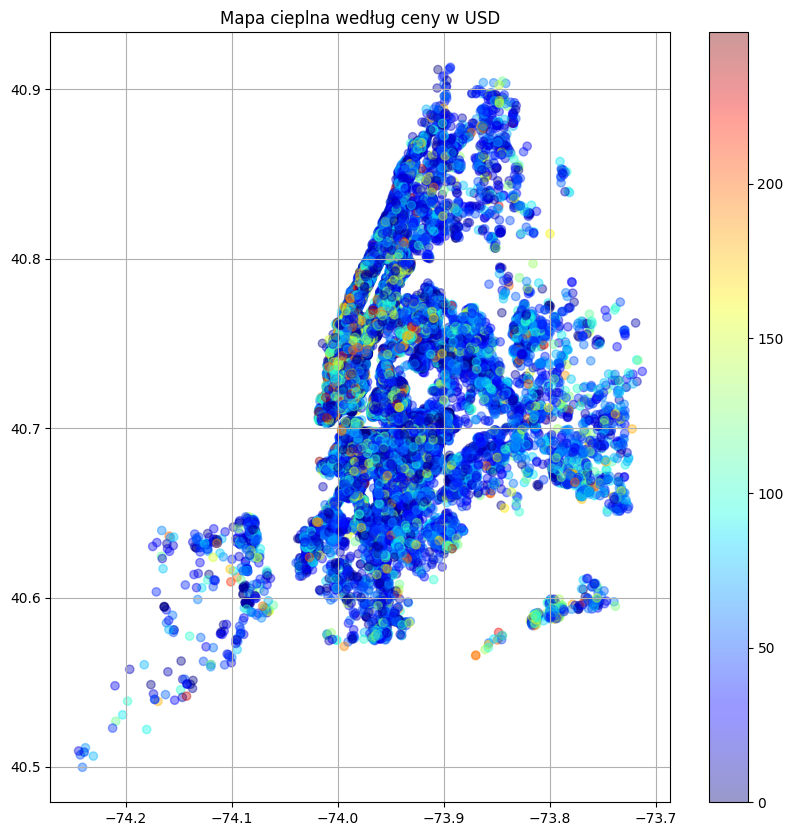

In [23]:
FILTER_PRICE_VALUE = 250
sub_airbnb = df[df.price_per_night < FILTER_PRICE_VALUE]
fig, ax = plt.subplots(figsize=(10, 10))
cmap = plt.get_cmap('jet')
c = sub_airbnb.price_per_night 
alpha = 0.5 
label = "airbnb"
price_heatmap = ax.scatter(sub_airbnb.longitude, sub_airbnb.latitude, label=label, c=c,
 cmap=cmap, alpha=0.4)
plt.title("Mapa cieplna według ceny w USD")
plt.colorbar(price_heatmap)
plt.grid(True)
plt.show()

## Top 5 wynajmujących pod względem ilości ofert

Zastosowanie rankingu dotyczącego ilości wystawionych ogłoszeń przez jednego wynajmującego pomaga dostrzec skalę oraz charakter korzystania z portalu przez użytkownika. Pozwala też na wyodrębnienie najwyższych wyników portalu pod tym względem w porównaniu do reszty wyników.

In [24]:
top_hosts = (pd.DataFrame(df.host_id.value_counts())).head(5)
top_hosts.columns=['Liczba ofert']
top_hosts['host_id'] = top_hosts.index
top_hosts.reset_index(drop=True, inplace=True)
top_hosts

,Liczba ofert,host_id
0,327,219517861
1,232,107434423
2,121,30283594
3,99,137358866
4,96,12243051


!!! Dodać ilość recenzji sumaryczną dla hosta, plus zobaczyć gdzie ten host ma te oferty na mapce, plus co ten host wynajmuje(podział na typy) / Paweł

In [25]:
new_dataframe = df[['host_id', 'number_of_reviews', 'latitude', 'longitude', 'price_per_night', 'room_type']]
top_hosts_count_reviews = new_dataframe[(new_dataframe['host_id'] == 37312959) | (new_dataframe['host_id'] == 107434423) | (new_dataframe['host_id'] == 30283594) | (new_dataframe['host_id'] == 137358866) | (new_dataframe['host_id'] == 16098958)].reset_index(drop=True) 
rev_top_group = top_hosts_count_reviews.groupby('host_id', as_index = False)['number_of_reviews'].sum()
rev_top_group


,host_id,number_of_reviews
0,16098958,138
1,30283594,65
2,37312959,2273
3,107434423,29
4,137358866,87


Użytkownik na najwyższym poziomie rankingu ofert wystawił dokładnie 327 mieszkań, jednak jest to odosobniony przypadek, ponieważ już drugi użytkownik w rankingu miał tych ofert o prawie 100 mniej. Jedynie 4 użytkowników z serwisu wystawiało ponad 100 ofert, więc zdecydowana większość wynajmujących osób nie przekroczy tej bariery.

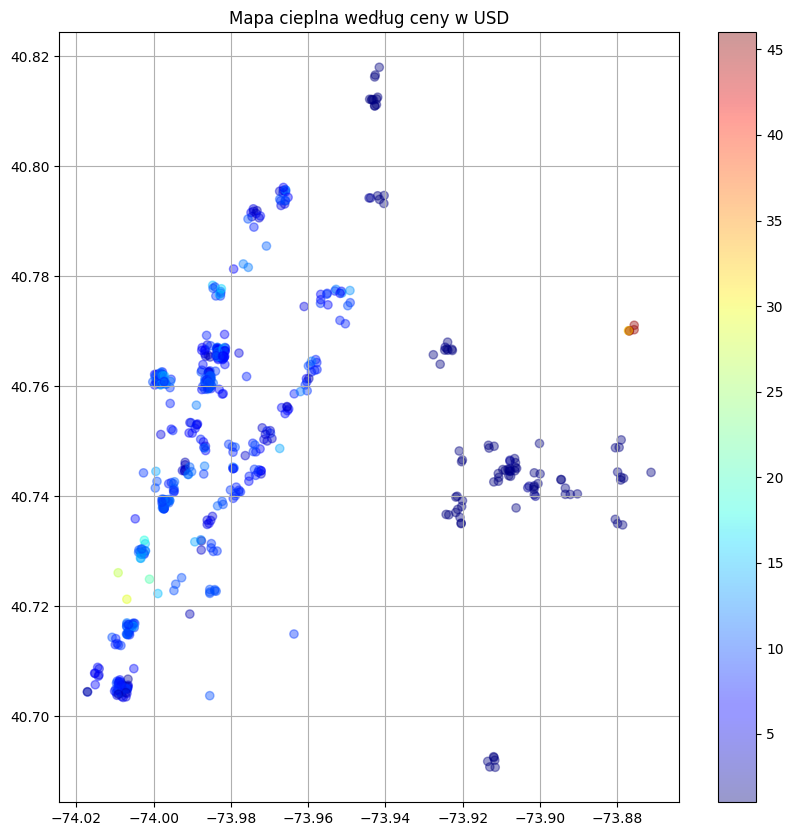

In [26]:
FILTER_PRICE_VALUE = 250
sub_airbnb = top_hosts_count_reviews[top_hosts_count_reviews.price_per_night < FILTER_PRICE_VALUE]
fig, ax = plt.subplots(figsize=(10, 10))
cmap = plt.get_cmap('jet')
c = sub_airbnb.price_per_night 
alpha = 0.5 
label = "airbnb"
price_heatmap = ax.scatter(sub_airbnb.longitude, sub_airbnb.latitude, label=label, c=c,
 cmap=cmap, alpha=0.4)
plt.title("Mapa cieplna według ceny w USD")
plt.colorbar(price_heatmap)
plt.grid(True)
plt.show()

In [27]:
map = folium.Map([40.7128,-74.0060],zoom_start=11)
folium.plugins.HeatMap(top_hosts_count_reviews[['latitude','longitude']].dropna(),
                       radius=8).add_to(map)
display(map)


()

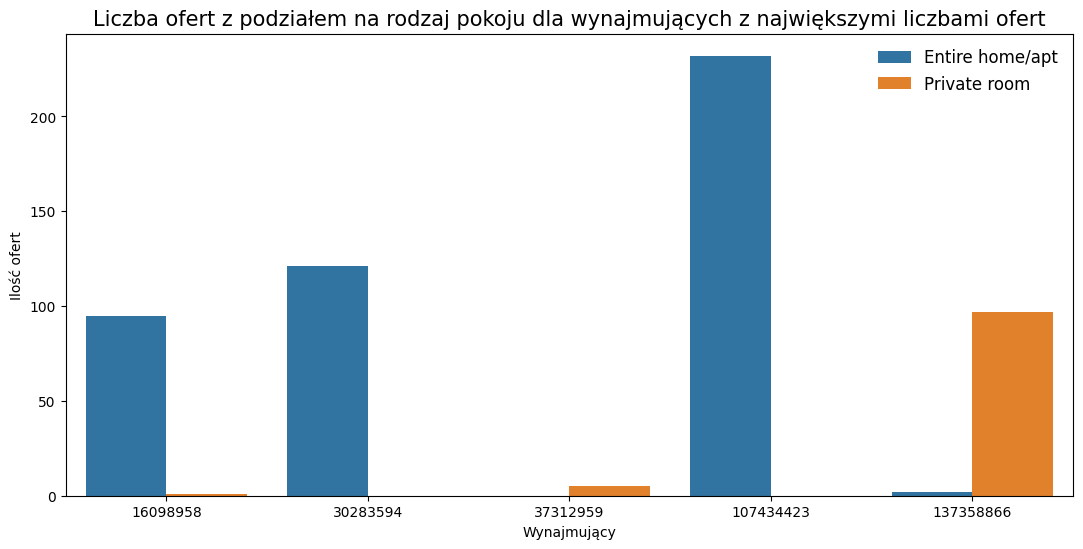

In [28]:
plt.figure(figsize=(13,6))
sns.countplot(data=top_hosts_count_reviews, x='host_id', hue='room_type')
plt.title('Liczba ofert z podziałem na rodzaj pokoju dla wynajmujących z największymi liczbami ofert', fontsize=15)
plt.xlabel('Wynajmujący')
plt.ylabel("Ilość ofert")
plt.legend(frameon=False, fontsize=12) 
()

## Top 5 wynajmujących pod względem ilości recenzji

In [29]:
reviews_top = pd.DataFrame(df.groupby('host_id').sum()['number_of_reviews'])
reviews_top_top = (reviews_top.sort_values('number_of_reviews',ascending=False)).head(5)
reviews_top_top.columns = ['Liczba recenzji']
reviews_top_top['Host_id'] = reviews_top_top.index
reviews_top_top.reset_index(drop=True, inplace=True)
reviews_top_top

,Liczba recenzji,Host_id
0,2273,37312959
1,2205,344035
2,2017,26432133
3,1971,35524316
4,1818,40176101


## Top 5 Okręgi pod względem ilości ofert

Wyodrębnienie ilości ogłoszeń ze względu na dzielnice pomaga zaobserwować "popularność" okręgów Nowego Jorku. Podział ilości ogłoszeń na okręgi pozwala stwierdzić, które z nich są najbardziej przyjazne potencjalnym najemcom. Oznacza to także atrakcyjność danego obszaru, ponieważ większa sieć mieszkań do wynajęcia może współgrać z większym skupiskiem ludności danej przestrzeni, co także może przełożyć się na bogatsze i bezpieczniejsze warunki życiowe ludności.

In [30]:
df["neighbourhood_group"] = df["neighbourhood_group"].map(hrabstwo_mapping_reversed)
df["neighbourhood"] = df["neighbourhood"].map(dzielnica_mapping_reversed)

In [31]:
top_neigh = pd.DataFrame(df['neighbourhood_group'].value_counts().head(5))
top_neigh.columns=['Liczba ofert']
top_neigh['Okręg'] = top_neigh.index
top_neigh.reset_index(drop=True, inplace=True)
top_neigh

,Liczba ofert,Okręg
0,21614,Manhattan
1,19894,Brooklyn
2,5584,Queens
3,1035,Bronx
4,364,Staten Island


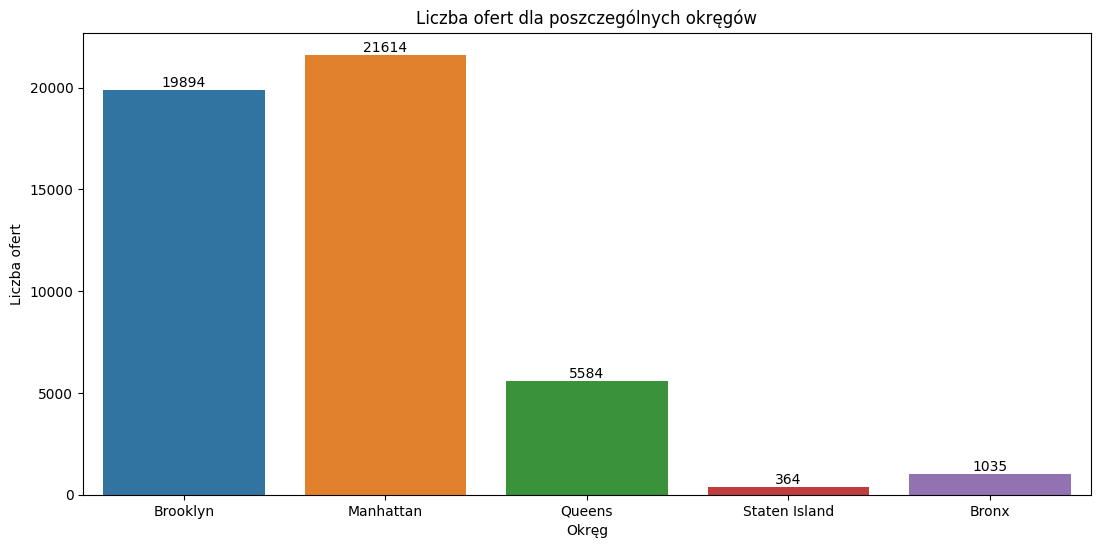

In [32]:
f,ax = plt.subplots(figsize=(13,6))
ax = sns.countplot(x=df.neighbourhood_group)
ax.bar_label(ax.containers[0])
plt.xlabel("Okręg")
plt.ylabel("Liczba ofert")
plt.title("Liczba ofert dla poszczególnych okręgów")
plt.show()

W aspekcie ilości ofert podzielonej na okręgi przoduje Manhattan, jednak zaraz za nim jest Brooklyn z minimalną różnicą ofert. Między tymi dwoma okręgami jest zauważalna natomiast spora różnica pomiędzy pozostałymi okręgami. Queens plasujące się na trzecim miejscu posiada prawie czterokrotnie mniej ilości ofert od przodujących okręgach. Ostatnie dwa okręgi mają w porównaniu do innych przestrzeni Nowego Jorku niewielką liczbe ofert na portalu AirBnb.

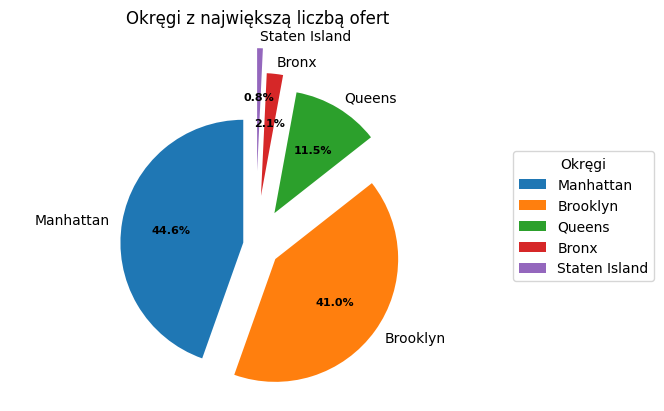

In [33]:
labels = df.neighbourhood_group.value_counts().index
sizes = df.neighbourhood_group.value_counts().values
explode = (0.1, 0.2, 0.3, 0.4, 0.6)

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
                                   shadow=False, startangle=90)
ax.axis('equal')
ax.set(title="Okręgi z największą liczbą ofert")
ax.legend(wedges, labels,
          title="Okręgi",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
plt.show()

Wykres kołowy pozwala na zobrazowanie wielkości zajmowanego "kawałka tortu" przez dwa największe okręgi pod względem ilości ofert mieszkanowych na serwisie AirBnb. Razem zajmują ponad 85% wszystkich ofert portalu. Swoją niszę ma także Queens, które zajmuje 11,6% i plasuje się na pozycji trzeciej. Bronx i Staten Island praktycznie nie liczą się w tym aspekcie, a ilość ogłoszeń może powodować o ich ekskluzywności. Jeśli dana osoba szukałaby oferty w tych okolicach musiałaby liczyć się z trudnością w odnalezieniu pasującego ogłoszenia.

## Top 5 dzielnic w każdym okręgu pod względem ilości ofert

### Brooklyn

In [34]:
top_dzielnice_Brooklyn = (pd.DataFrame(d_df_Brooklyn['neighbourhood'].value_counts())).head(5)
top_dzielnice_Brooklyn.columns=['Liczba ofert']
top_dzielnice_Brooklyn['Dzielnica'] = top_dzielnice_Brooklyn.index
top_dzielnice_Brooklyn.reset_index(drop=True, inplace=True)
top_dzielnice_Brooklyn

,Liczba ofert,Dzielnica
0,3920,Williamsburg
1,3714,Bedford-Stuyvesant
2,2465,Bushwick
3,1564,Crown Heights
4,1115,Greenpoint


In [35]:
#Dzielnice Brooklyn
cena = df[df['neighbourhood_group'] == 'Brooklyn']
#Williamsburg
cena_Williamsburg = cena.loc[cena['neighbourhood'] == 'Williamsburg']
średnia_cena_Williamsburg = cena_Williamsburg['price_per_night'].mean()
#Bedford-Stuyvesant
cena_Bedford_Stuyvesant = cena.loc[cena['neighbourhood'] == 'Bedford-Stuyvesant']
średnia_cena_Bedford_Stuyvesant = cena_Bedford_Stuyvesant['price_per_night'].mean()
#Bushwick
cena_Bushwick = cena.loc[cena['neighbourhood'] == 'Bushwick']
średnia_cena_Bushwick = cena_Bushwick['price_per_night'].mean()
#Crown Heights
cena_Crown_Heights = cena.loc[cena['neighbourhood'] == 'Crown Heights']
średnia_cena_Crown_Heights = cena_Crown_Heights['price_per_night'].mean()
#Greenpoint
cena_Greenpoint = cena.loc[cena['neighbourhood'] == 'Greenpoint']
średnia_cena_Greenpoint = cena_Greenpoint['price_per_night'].mean()

#Tabela
tabela_brooklyn = [['Williamsburg', średnia_cena_Williamsburg],['Bedford-Stuyvesant', średnia_cena_Bedford_Stuyvesant],['Bushwick', średnia_cena_Bushwick],['Crown Heights', średnia_cena_Crown_Heights],['Greenpoint', średnia_cena_Greenpoint]]
df_tabela_brooklyn = pd.DataFrame(tabela_brooklyn)
df_tabela_brooklyn.columns = 'Dzielnica', 'Średnia cena za noc'
df_tabela_brooklyn

,Dzielnica,Średnia cena za noc
0,Williamsburg,64.243865
1,Bedford-Stuyvesant,50.834195
2,Bushwick,41.301359
3,Crown Heights,52.432187
4,Greenpoint,59.975676


### Manhattan

In [36]:
top_dzielnice_Manhattan = (pd.DataFrame(d_df_Manhattan['neighbourhood'].value_counts())).head(5)
top_dzielnice_Manhattan.columns=['Liczba ofert']
top_dzielnice_Manhattan['Dzielnica'] = top_dzielnice_Manhattan.index
top_dzielnice_Manhattan.reset_index(drop=True, inplace=True)
top_dzielnice_Manhattan

,Liczba ofert,Dzielnica
0,2658,Harlem
1,1971,Upper West Side
2,1958,Hell's Kitchen
3,1853,East Village
4,1798,Upper East Side


In [37]:
#Dzielnice Manhattan
cena = df[df['neighbourhood_group'] == 'Manhattan']
#Harlem
cena_Harlem = cena.loc[cena['neighbourhood'] == 'Harlem']
średnia_cena_Harlem = cena_Harlem['price_per_night'].mean()
#Upper West Side
cena_Upper_West_Side = cena.loc[cena['neighbourhood'] == 'Upper West Side']
średnia_cena_Upper_West_Side = cena_Upper_West_Side['price_per_night'].mean()
#Hell's Kitchen
cena_Hells_Kitchen = cena.loc[cena['neighbourhood'] == "Hell's Kitchen"]
średnia_cena_Hells_Kitchen = cena_Hells_Kitchen['price_per_night'].mean()
#East Village
cena_East_Village = cena.loc[cena['neighbourhood'] == 'East Village']
średnia_cena_East_Village = cena_East_Village['price_per_night'].mean()
#Upper East Side
cena_Upper_East_Side = cena.loc[cena['neighbourhood'] == 'Upper East Side']
średnia_cena_Upper_East_Side = cena_Upper_East_Side['price_per_night'].mean()

#Tabela
tabela_Manhattan = [['Harlem', średnia_cena_Harlem],['Upper West Side', średnia_cena_Upper_West_Side],["Hell's Kitchen", średnia_cena_Hells_Kitchen],['East Village', średnia_cena_East_Village],['Upper East Side', średnia_cena_Upper_East_Side]]
df_tabela_Manhattan = pd.DataFrame(tabela_Manhattan)
df_tabela_Manhattan.columns = 'Dzielnica', 'Średnia cena za noc'
df_tabela_Manhattan

,Dzielnica,Średnia cena za noc
0,Harlem,56.198110
1,Upper West Side,83.676486
2,Hell's Kitchen,92.709611
3,East Village,86.233261
4,Upper East Side,82.467706


### Queens

In [38]:
top_dzielnice_Queens = (pd.DataFrame(d_df_Queens['neighbourhood'].value_counts())).head(5)
top_dzielnice_Queens.columns=['Liczba ofert']
top_dzielnice_Queens['Dzielnica'] = top_dzielnice_Queens.index
top_dzielnice_Queens.reset_index(drop=True, inplace=True)
top_dzielnice_Queens

,Liczba ofert,Dzielnica
0,900,Astoria
1,537,Long Island City
2,426,Flushing
3,423,Ridgewood
4,363,Sunnyside


In [39]:
#Dzielnice Queens
cena = df.loc[df['neighbourhood_group'] == 'Queens']
#Astoria
cena_Astoria = cena.loc[cena['neighbourhood'] == 'Astoria']
średnia_cena_Astoria = cena_Astoria['price_per_night'].mean()
#Long Island City
cena_Long_Island_City = cena.loc[cena['neighbourhood'] == 'Long Island City']
średnia_cena_Long_Island_City = cena_Long_Island_City['price_per_night'].mean()
#Flushing
cena_Flushing = cena.loc[cena['neighbourhood'] == "Flushing"]
średnia_cena_Flushing = cena_Flushing['price_per_night'].mean()
#Ridgewood
cena_Ridgewood = cena.loc[cena['neighbourhood'] == 'Ridgewood']
średnia_cena_Ridgewood = cena_Ridgewood['price_per_night'].mean()
#Sunnyside
cena_Sunnyside = cena.loc[cena['neighbourhood'] == 'Sunnyside']
średnia_cena_Sunnyside = cena_Sunnyside['price_per_night'].mean()

#Tabela
tabela_Queens = [['Astoria', średnia_cena_Astoria],['Long Island City', średnia_cena_Long_Island_City],["Flushing", średnia_cena_Flushing],['Ridgewood', średnia_cena_Ridgewood],['Sunnyside', średnia_cena_Sunnyside]]
df_tabela_Queens = pd.DataFrame(tabela_Queens)
df_tabela_Queens.columns = 'Dzielnica', 'Średnia cena za noc'
df_tabela_Queens

,Dzielnica,Średnia cena za noc
0,Astoria,50.135045
1,Long Island City,69.318436
2,Flushing,61.185714
3,Ridgewood,35.028916
4,Sunnyside,42.136111


### Staten Island

In [40]:
top_dzielnice_Staten_Island = (pd.DataFrame(d_df_Staten_Island['neighbourhood'].value_counts())).head(5)
top_dzielnice_Staten_Island.columns=['Liczba ofert']
top_dzielnice_Staten_Island['Dzielnica'] = top_dzielnice_Staten_Island.index
top_dzielnice_Staten_Island.reset_index(drop=True, inplace=True)
top_dzielnice_Staten_Island

,Liczba ofert,Dzielnica
0,48,St. George
1,42,Tompkinsville
2,27,Stapleton
3,26,Concord
4,21,Arrochar


In [41]:
#Dzielnice Staten Island
cena = df.loc[df['neighbourhood_group'] == 'Staten Island']
#St. George
cena_St_George = cena.loc[cena['neighbourhood'] == 'St. George']
średnia_cena_St_George = cena_St_George['price_per_night'].mean()
#Tompkinsville
cena_Tompkinsville = cena.loc[cena['neighbourhood'] == 'Tompkinsville']
średnia_cena_Tompkinsville = cena_Tompkinsville['price_per_night'].mean()
#Stapleton
cena_Stapleton = cena.loc[cena['neighbourhood'] == "Stapleton"]
średnia_cena_Stapleton = cena_Stapleton['price_per_night'].mean()
#Concord
cena_Concord = cena.loc[cena['neighbourhood'] == 'Concord']
średnia_cena_Concord = cena_Concord['price_per_night'].mean()
#Arrochar
cena_Arrochar = cena.loc[cena['neighbourhood'] == 'Arrochar']
średnia_cena_Arrochar = cena_Arrochar['price_per_night'].mean()

#Tabela
tabela_Staten_Island = [['St. George', średnia_cena_St_George],['Tompkinsville', średnia_cena_Tompkinsville],["Stapleton", średnia_cena_Stapleton],['Concord', średnia_cena_Concord],['Arrochar', średnia_cena_Arrochar]]
df_tabela_Staten_Island = pd.DataFrame(tabela_Staten_Island)
df_tabela_Staten_Island.columns = 'Dzielnica', 'Średnia cena za noc'
df_tabela_Staten_Island

,Dzielnica,Średnia cena za noc
0,St. George,71.638298
1,Tompkinsville,41.928571
2,Stapleton,58.592593
3,Concord,26.760000
4,Arrochar,59.380952


### Bronx

In [42]:
top_dzielnice_Bronx = (pd.DataFrame(d_df_Bronx['neighbourhood'].value_counts())).head(5)
top_dzielnice_Bronx.columns=['Liczba ofert']
top_dzielnice_Bronx['Dzielnica'] = top_dzielnice_Bronx.index
top_dzielnice_Bronx.reset_index(drop=True, inplace=True)
top_dzielnice_Bronx

,Liczba ofert,Dzielnica
0,70,Kingsbridge
1,63,Fordham
2,62,Longwood
3,60,Mott Haven
4,50,Concourse


In [43]:
#Dzielnice Bronx
cena = df.loc[df['neighbourhood_group'] == 'Bronx']
#Kingsbridge
cena_Kingsbridge = cena.loc[cena['neighbourhood'] == 'Kingsbridge']
średnia_cena_Kingsbridge = cena_Kingsbridge['price_per_night'].mean()
#Fordham
cena_Fordham = cena.loc[cena['neighbourhood'] == 'Fordham']
średnia_cena_Fordham = cena_Fordham['price_per_night'].mean()
#Longwood
cena_Longwood = cena.loc[cena['neighbourhood'] == "Longwood"]
średnia_cena_Longwood = cena_Longwood['price_per_night'].mean()
#Mott Haven
cena_Mott_Haven = cena.loc[cena['neighbourhood'] == 'Mott Haven']
średnia_cena_Mott_Haven = cena_Mott_Haven['price_per_night'].mean()
#Concourse
cena_Concourse = cena.loc[cena['neighbourhood'] == 'Concourse']
średnia_cena_Concourse = cena_Concourse['price_per_night'].mean()

#Tabela
tabela_Bronx = [['Kingsbridge', średnia_cena_Kingsbridge],['Fordham', średnia_cena_Fordham],["Longwood", średnia_cena_Longwood],['Mott Haven', średnia_cena_Mott_Haven],['Concourse', średnia_cena_Concourse]]
df_tabela_Bronx = pd.DataFrame(tabela_Bronx)
df_tabela_Bronx.columns = 'Dzielnica', 'Średnia cena za noc'
df_tabela_Bronx

,Dzielnica,Średnia cena za noc
0,Kingsbridge,41.086957
1,Fordham,37.800000
2,Longwood,55.360656
3,Mott Haven,50.016667
4,Concourse,57.360000


## Top 3 ofert pod względem liczby recenzji

Podział na największą ilość wyświetleń pozwala na sprawdzenie popularności serwisu oraz jego ofert. Oferta z największą ilością wyświetleń badanego okresu wynosi dokładnie 629. W takim razie oferty w Nowym Jorku mogą przyciągać do siebie kilkuset użytkowników serwisu.

In [44]:
rev_group = pd.DataFrame(df.groupby('number_of_reviews').sum()['host_id'])
most_reviewed = (rev_group.sort_values('number_of_reviews',ascending=False)).head(3)
most_reviewed.columns = ['Host ID']
most_reviewed['Liczba recenzji'] = most_reviewed.index
most_reviewed.reset_index(drop=True, inplace=True)
most_reviewed


,Host ID,Liczba recenzji
0,47621202,629
1,4734398,607
2,4734398,597


!!! Przejrzeć te hosty pod względem ilości ofert, zobaczyć te oferty(typy pokojów itd itp), wyświetlić na mapie lokalizacje dla danego hosta, przejrzeć opisy ofert, przejrzeć ceny, porównać do średniej ceny ogólnej, sprawdzić ostatnią datę recenzji / Konrad

## Top 3 wynajmujących pod względem liczby miesięcznych recenzji

Wyświetlenia ofert serwisu w skali miesięcznej pozwolą na wizualizację popytu użytkowników w mniejszym okresie.

In [45]:
rev_month = pd.DataFrame(df.groupby('host_id').sum()['reviews_per_month'])
rev_month = (rev_month.sort_values('reviews_per_month', ascending=False)).head(5)
rev_month.columns = ['Liczba recenzji na miesiąc']
rev_month['Host_id'] = rev_month.index
rev_month.reset_index(drop=True, inplace=True)
rev_month

,Liczba recenzji na miesiąc,Host_id
0,397.56,219517861
1,111.72,244361589
2,80.63,232251881
3,68.02,26432133
4,62.89,137274917


In [46]:
top_host_objects = pd.DataFrame(df[["host_id", "name", "price", "price_per_night", "neighbourhood_group", "latitude", "longitude", "number_of_reviews"]])
top_host_objects = top_host_objects[top_host_objects["host_id"] == 219517861].reset_index(drop=True)
top_host_objects.sort_values("price_per_night", inplace=True, ascending=False)
top_host_objects.head(10)


,host_id,name,price,price_per_night,neighbourhood_group,latitude,longitude,number_of_reviews
205,219517861,Sonder | Wall Street | Superior 3BR + Rooftop,616,308,Manhattan,40.70597,-74.01248,5
157,219517861,Sonder | Stock Exchange | Sleek 3BR + Laundry,520,260,Manhattan,40.70645,-74.01186,6
70,219517861,Sonder | Stock Exchange | Original 3BR + Lounge,505,252,Manhattan,40.70785,-74.01239,7
164,219517861,Sonder | Stock Exchange | Calming 3BR + Laundry,505,252,Manhattan,40.70750,-74.01179,8
46,219517861,Sonder | Stock Exchange | Expansive 3BR + Kitchen,503,251,Manhattan,40.70631,-74.01098,7
27,219517861,Sonder | Stock Exchange | Calming 3BR + Sofa Bed,503,251,Manhattan,40.70645,-74.01203,5
99,219517861,Sonder | Stock Exchange | Sleek 3BR + Lounge,498,249,Manhattan,40.70620,-74.01192,8
183,219517861,Sonder | Stock Exchange | Polished 3BR + Kitchen,495,247,Manhattan,40.70715,-74.01030,7
131,219517861,Sonder | Stock Exchange | Original 3BR + Kitchen,484,242,Manhattan,40.70659,-74.01020,8
179,219517861,Sonder | Stock Exchange | Stunning 3BR + Sofa Bed,474,237,Manhattan,40.70729,-74.01095,9


In [47]:
top_host_objects["neighbourhood_group"].unique()


array(['Manhattan'], dtype=object)

In [48]:
# Tutaj uważam, że lepsze będzie nie dawanie markerów i wrzucenie wszystkich 327 obiektów, ale to do obgadania
top_host_rev_month = folium.Map([40.7128,-74.0060],zoom_start=11)
folium.plugins.HeatMap(top_host_objects[['latitude','longitude']].dropna(),
                       radius=8).add_to(top_host_rev_month)
display(top_host_rev_month)

!!! Przejrzeć te hosty pod względem ilości ofert, zobaczyć te oferty(typy pokojów itd itp), wyświetlić na mapie lokalizacje dla danego hosta, przejrzeć opisy ofert, przejrzeć ceny, porównać do średniej ceny ogólnej, sprawdzić ostatnią datę recenzji / Krystian

## Oferty według typu pokoju/apartamentu

Podczas korzystania z serwisu AirBnB możliwe będzie wynajęcie nie tylko całego mieszkania, ale również i współdzielonego pokoju, pojedynczego prywatnego pokoju, a nawet i całego wolnostojącego domu! W przypadku Nowego Jorku ta ostatnia wersja jest ekstremalną rzadkością, dlatego też możemy założyć, że kategoria "Entire home/apt" odnosi się w większości do apartamentów oraz różnego rodzaju mieszkań aniżeli całych domów w dosłownym znaczeniu. Poniższy wykres przedstawia rozkład wszystkich badanych tu ogłoszeń podzielonych i zestawionych ze sobą właśnie na podstawie typu wynajmowanego obiektu.

()

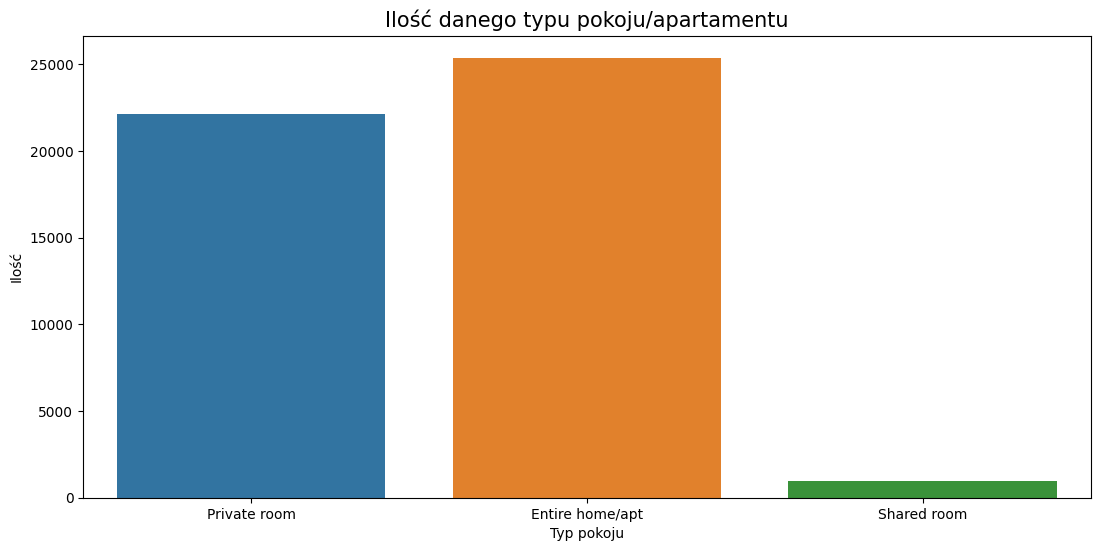

In [49]:
plt.figure(figsize=(13,6))
sns.countplot(data=df, x='room_type')
plt.title('Ilość danego typu pokoju/apartamentu', fontsize=15)
plt.xlabel('Typ pokoju')
plt.ylabel("Ilość")
()

Powyższy podział na rodzaje wynajmowanego mieszkania pozwala na obserwację niewielkiej różnicy w ilościach ogłoszeń pomiędzy jednym pokojem, a całym apartamentem na korzyść apartamentów oraz niewielkim wkładem w rynek pokojów dzielonych z lokatorem "shared room". Może to być spowodowane wieloma czynnikami. Najbardziej prawdopodobnym z nich jest fakt, że współdzielony pokój zapewnia bardzo niewielką przestrzeń prywatną, co dla wielu może przekreślić nawet najbardziej atrakcyjną ofertę pod względem położenia czy też nawet ceny.

Wynajmowanie prywatnego pokoju natomiast cieszy się bardzo dużą popularnością. Pozwala ona często na pasywny dochód dla właściciela mieszkania, ale niesie za sobą kolejne koszta, zarówno w postaci materialnej jak i wcześniej wspomnianej prywatności.

Ogłoszenia całych mieszkań jest zarezerwowane dla osób zamożnych, które najprawdopodobniej posiadają kolejną nieruchomość, która mogą wykorzystać jako swój dom, a poprzez wynajęcie zapewniają sobie dochód oraz potencjalnie nowe znajomości.

()

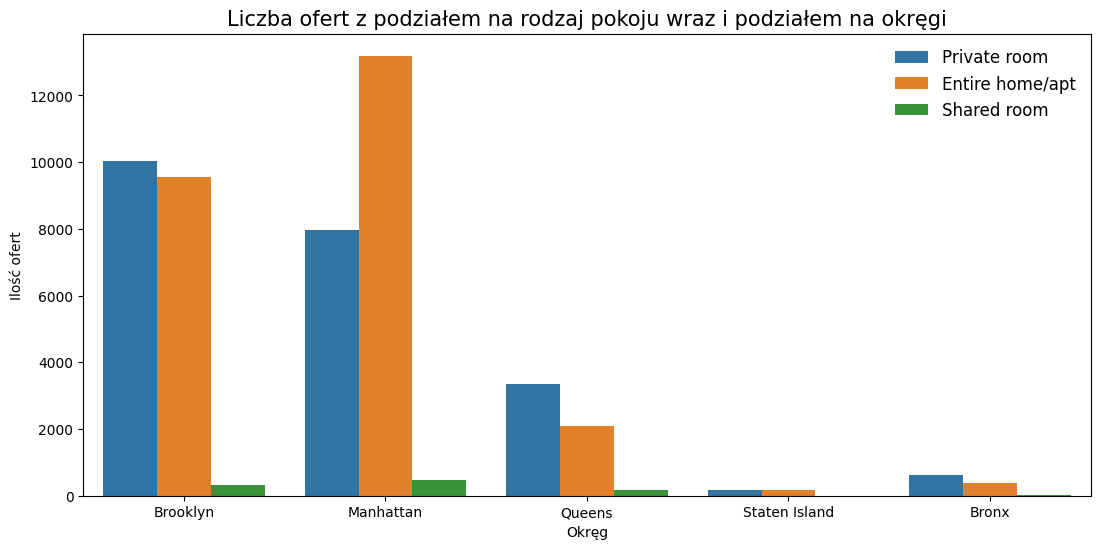

In [50]:
plt.figure(figsize=(13,6))
sns.countplot(data=df, x='neighbourhood_group', hue='room_type')
plt.title('Liczba ofert z podziałem na rodzaj pokoju wraz i podziałem na okręgi', fontsize=15)
plt.xlabel('Okręg')
plt.ylabel("Ilość ofert")
plt.legend(frameon=False, fontsize=12) 
()

Jak widać na powyższym wykresie, ilość wynajmowanych mieszkań jest największa na Manhattan'ie. Pokrywa się z wcześniejszym wnioskiem dotyczącym zamożności właściciela oraz wynajmowaniem całego mieszkania wyłącznie w celach zarobkowych. 

Proporcja współdzielonego pokoju pozostała na bardzo podobnym poziomie dla wszystkich badanych okręgów.

Ciekawym wynikiem jest natomiast większa ilość wynajmowanych prywatnych pokojów w porównaniu do całych mieszkań. Jest to prawdopodobnie uwarunkowane niższymi cenami i jak będzie to przedstawione na kolejnych wykresach, ceny pomiędzy okręgami mogą się różnić nawet kilkukrotnie dla mieszkania czy też pokoju z podobnego poziomu. Kolejnym powodem może być ogromna przewaga wynajmowania całych mieszkań ponad pokojami na Manhattan'ie, natomiast w rozrachunku dla całego Nowego Jorku, nie widzimy aż takiej różnicy.

Ciekawa wizualizacja sporej przewagi ilości ofert apartamentów nad pokojami w Manhatanie i niewielkiej przewagi pokojów w pozostałych okręgach. 

### Rozkłady cen ogłoszeń dla każdego z okręgów

Ze względu na ogromną różnicę w ilości ogłoszeń pomiędzy Manhattanem czy też Brooklynem, a pozostałymi dzielnicami, ciekawym punktem zaczepienia będzie zestawienie ich cen ze względu na położenie. W tym celu, skorzystamy z wykresu skrzypcowego z podziałem na główne badane okręgi. Pozwoli to określić w jaki sposób rozkładają się ceny mieszkań w każdym z nich. Ze względu na rozstrzał danych w kategori cen, konieczne jest jej ograniczenie do pewnej wartości. Uważamy, że górną granicą za jedną noc może być kwota $500. 

In [51]:
expensive_apts = df[["host_id", "name", "price", "price_per_night", "neighbourhood_group", "latitude", "longitude", "number_of_reviews", "minimum_nights"]].copy()
# Jeżeli chcemy odwrócić znowu na wartości liczbowe to używamy map(hrabstwo_mapping) zamiast map(hrabstwo_mapping_reversed)
expensive_apts.sort_values("price_per_night", inplace=True, ascending=False)
expensive_apts.head(20)

,host_id,name,price,price_per_night,neighbourhood_group,latitude,longitude,number_of_reviews,minimum_nights
4377,1177497,Film Location,8000,8000,Brooklyn,40.69137,-73.96723,1,1
29662,156158778,East 72nd Townhouse by (Hidden by Airbnb),7703,7703,Manhattan,40.76824,-73.95989,0,1
42523,7407743,70' Luxury MotorYacht on the Hudson,7500,7500,Manhattan,40.71162,-74.01693,0,1
45666,262534951,Gem of east Flatbush,7500,7500,Brooklyn,40.65724,-73.92450,8,1
44034,3750764,3000 sq ft daylight photo studio,6800,6800,Manhattan,40.75060,-74.00388,0,1
3774,11598359,SUPER BOWL Brooklyn Duplex Apt!!,6500,6500,Brooklyn,40.68766,-73.96439,0,1
29664,156158778,Park Avenue Mansion by (Hidden by Airbnb),6419,6419,Manhattan,40.78517,-73.95270,0,1
15560,66240032,Luxury townhouse Greenwich Village,6000,6000,Manhattan,40.73046,-73.99562,0,1
3720,1483320,"SuperBowl Penthouse Loft 3,000 sqft",5250,5250,Manhattan,40.71895,-73.99793,0,1
38000,172611460,4-Floor Unique Event Space 50P Cap. - #10299B,5000,5000,Manhattan,40.82511,-73.94961,2,1


In [52]:
def add_Markers(dest_map, dataframe, amount = 30):
   # dest_map: mapa, na którą chcemy nałożyć markery
   # dataframe: dataframe, z którego pobierane będą dane w celu określenia pozycji markerów
   # amount: ilość markerów do utworzenia na mapie. Ilość jest brana z head'a danego dataframe'a, dlatego też może konieczne być sortowanie
    for i in range(0,amount):
       folium.Marker(
          location=[dataframe.head(amount).iloc[i]['latitude'], dataframe.head(amount).iloc[i]['longitude']],
          popup=dataframe.head(amount).iloc[i]['name'],
       ).add_to(dest_map)

In [53]:
expensive_map = folium.Map([40.7128,-74.0060],zoom_start=11)
folium.plugins.HeatMap(expensive_apts[['latitude','longitude']].head(30).dropna(),
                       radius=8, gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(expensive_map)

add_Markers(expensive_map, expensive_apts)

expensive_map

In [54]:
expensive_apts.sort_values("price", inplace=True)
expensive_apts.head(15)

,host_id,name,price,price_per_night,neighbourhood_group,latitude,longitude,number_of_reviews,minimum_nights
9146,10945786,15 min walk to Prospect Park!,30,5,Brooklyn,40.65887,-73.94882,1,6
29431,76664098,A cozy place to rest,30,30,Queens,40.75981,-73.82021,0,1
12933,38064272,Cozy Room in Cozy Apartment,30,30,Brooklyn,40.68535,-73.95036,3,1
40036,232251881,6 Minutes From JFK Airport Cozy Bedroom,30,30,Queens,40.66800,-73.78477,98,1
4757,4044499,Happy big family,30,30,Brooklyn,40.65287,-73.96353,0,1
26381,151291713,Cheap bedroom with private half bath attached!,30,30,Manhattan,40.85014,-73.93743,67,1
14395,8145820,Room in East Harlem,30,30,Manhattan,40.79606,-73.94881,1,1
3903,8904815,Relaxed Comfortable Beds in A Cozy Apartment.,30,6,Brooklyn,40.64307,-73.95455,34,5
17701,23526253,Private Room in Fun Neighborhood,30,2,Queens,40.71164,-73.91879,0,15
776,1452026,Large Room in a Huge NY apartment.,30,6,Queens,40.77117,-73.91905,3,5


In [55]:
cheap_map = folium.Map([40.6810,-74.0060],zoom_start=11)
folium.plugins.HeatMap(expensive_apts[['latitude','longitude']].head(30).dropna(),
                       radius=8, gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(cheap_map)

add_Markers(cheap_map, expensive_apts)
display(cheap_map)

!!! Sprawdzić wartości odstające, co to jest, czemu tak jest, jak coś to je usunąć, wyświetlenie i przebadanie tego / Krystian

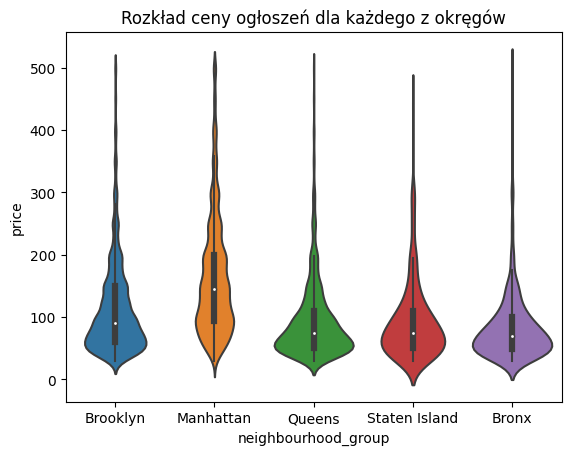

In [56]:
sub=df[df.price <= 500]
viol=sns.violinplot(data=sub, x='neighbourhood_group', y='price').set(title="Rozkład ceny ogłoszeń dla każdego z okręgów")

Powyższy wykres pokazuje, jak bardzo różni się docelowy rynek pomiędzy Manhattan'em, a resztą Nowego Jorku. 

Dla każdego z pozostałych okręgów możemy zaobserwować widoczne "wybrzuszenie się" naszych skrzypiec w dolnych granicach, gdzieś około wartości $60 - $70 i potem mniej lub bardziej gwałtowny spadek ilości ogłoszeń, aż do osiągnięcia bardzo niewielkiej szerokości naszych wykresów. Średnia wartość plasuje się w okolicach $80 dla Brooklynu, Queens, Staten Island oraz Bronxu.

Sytuacja wygląda zgoła inaczej w przypadku Manhattanu. Sama średnia kwota, którą musimy zapłacić wynosi w przybliżeniu $150. Nie jesteśmy w stanie również zaobserwować tak dużej ilości ogłoszeń w podobnej cenie, jako że ilość ogłoszeń maleje w znacznie wolniejszym tempie w porównaniu do pozostałych okręgów. Widzimy również zwężenie do minimalnej szerokości następuje gdzieś w okolicy $400, gdzie dla reszty dzieję się to przy około $300. Pokazuje to, że w tym miejscu możemy znaleźć znacznie bardziej różnorodne mieszkania o różnych standardach, co jest mnożone poprzez umiejscowienie geograficzne w okolicy ludzi sukcesu oraz bogaczy.

Ze względu na ciekawe wyniki powyższych odczytów, sprawdzmy jak statystycznie wyglądają ceny w poszczególnych dzielnicach.
Poniżej umieściliśmy dane z cen dla każdej z dzielnic w jednej liście.

In [57]:
#Brooklyn
sub_1=df.loc[df['neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['price']]
#Manhattan
sub_2=df.loc[df['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['price']]
#Queens
sub_3=df.loc[df['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]
#Staten Island
sub_4=df.loc[df['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]
#Bronx
sub_5=df.loc[df['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]

price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

Teraz utworzymy tabelę, która pokaże nam, jak wyglądają poszczególne kwartyle dla każdego z okręgów. Pozwoli to nam określić, jak na przestrzeni całego zbioru plasują się określone mieszkania i jakich kategorii cenowych możemy oczekiwać.

In [58]:
data_table=[]
name_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

#Zbieranie statystyk dla cen określonych przez centyle

for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    data_table.append(i)
    
#
#Zmiana nazw w celu łatwiejszego odczytania nazw okręgów 
   
for i in range(5):
    data_table[i].rename(columns={'price':name_list[i]}, inplace=True)  
data_table=[df.set_index('Stats') for df in data_table]
data_table=data_table[0].join(data_table[1:])
data_table

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,30.0,30.0,30.0,30.0,30.0
25%,60.0,95.0,51.0,50.0,50.0
50%,93.0,150.0,75.0,75.0,69.0
75%,150.0,220.0,112.0,110.0,100.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


In [59]:
#Brooklyn
sub_1_price_per_night=df.loc[df['neighbourhood_group'] == 'Brooklyn']
price_per_night_sub1=sub_1[['price_per_night']]
#Manhattan
sub_2_price_per_night=df.loc[df['neighbourhood_group'] == 'Manhattan']
price_per_night_sub2=sub_2[['price_per_night']]
#Queens
sub_3_price_per_night=df.loc[df['neighbourhood_group'] == 'Queens']
price_per_night_sub3=sub_3[['price_per_night']]
#Staten Island
sub_4_price_per_night=df.loc[df['neighbourhood_group'] == 'Staten Island']
price_per_night_sub4=sub_4[['price_per_night']]
#Bronx
sub_5_price_per_night=df.loc[df['neighbourhood_group'] == 'Bronx']
price_per_night_sub5=sub_5[['price_per_night']]

price_per_night_list_by_n=[price_per_night_sub1, price_per_night_sub2, price_per_night_sub3, price_per_night_sub4, price_per_night_sub5]

In [60]:
data_table=[]
name_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

#Zbieranie statystyk dla cen określonych przez centyle

for x in price_per_night_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    data_table.append(i)
    
#
#Zmiana nazw w celu łatwiejszego odczytania nazw okręgów 
   
for i in range(5):
    data_table[i].rename(columns={'price_per_night':name_list[i]}, inplace=True)  
data_table=[df.set_index('Stats') for df in data_table]
data_table=data_table[0].join(data_table[1:])
data_table


,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,0.0,0.0,0.0
25%,19.0,20.0,21.0,20.0,20.0
50%,40.0,50.0,43.0,40.0,37.0
75%,69.0,100.0,70.0,65.0,60.0
max,8000.0,7703.0,2000.0,5000.0,1250.0


!!! Zmienić na typy pokojów i poszczególne Okręgi/ Paweł

### Brooklyn

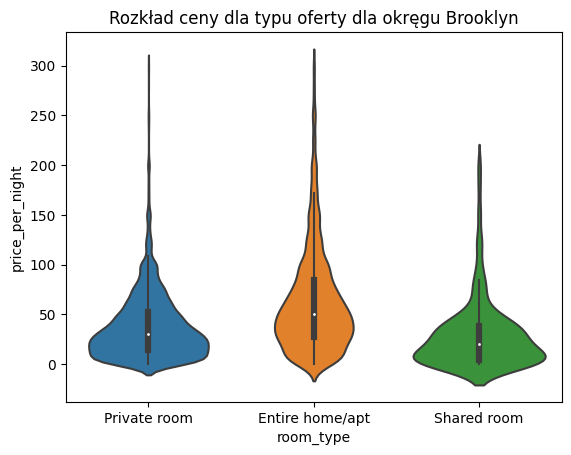

In [61]:
sub=n_df_Brooklyn[n_df_Brooklyn.price_per_night <= 300]
viol=sns.violinplot(data=sub, x='room_type', y='price_per_night').set(title="Rozkład ceny dla typu oferty dla okręgu Brooklyn")

In [62]:
#room Type
sub_1=n_df_Brooklyn.loc[n_df_Brooklyn['room_type'] == 'Private room']
price_per_night_sub1=sub_1[['price_per_night']]

sub_1=n_df_Brooklyn.loc[n_df_Brooklyn['room_type'] == 'Entire home/apt']
price_per_night_sub1=sub_1[['price_per_night']]

sub_1=n_df_Brooklyn.loc[n_df_Brooklyn['room_type'] == 'Shared room']
price_per_night_sub1=sub_1[['price_per_night']]


price_per_night_list_by_n=[price_per_night_sub1, price_per_night_sub2, price_per_night_sub3]

In [63]:
data_table=[]
name_list=['Private room', 'Entire home/apt', 'Shared room']

for x in price_per_night_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Brooklyn'}, inplace=True)
    data_table.append(i)
    

#Zmiana nazw w celu łatwiejszego odczytania nazw okręgów 
   
for i in range(3):
    data_table[i].rename(columns={'price_per_night':name_list[i]}, inplace=True)  
data_table=[df.set_index('Brooklyn') for df in data_table]
data_table=data_table[0].join(data_table[1:])
data_table

,Private room,Entire home/apt,Shared room
Brooklyn,,,
min,0.0,0.0,0.0
25%,4.0,20.0,21.0
50%,20.0,50.0,43.0
75%,38.0,100.0,70.0
max,725.0,7703.0,2000.0


### Manhattan

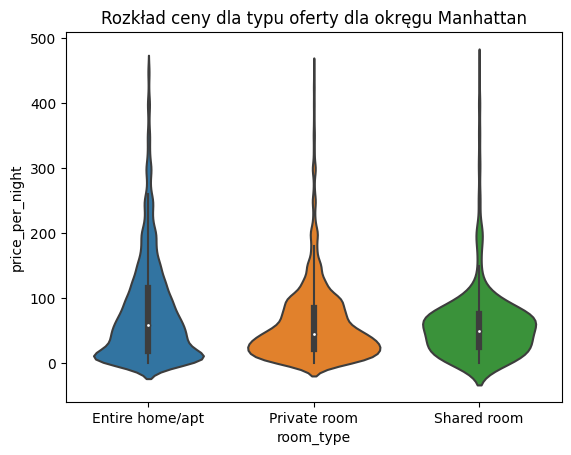

In [64]:
sub=n_df_Manhattan[n_df_Manhattan.price_per_night <= 450]
viol=sns.violinplot(data=sub, x='room_type', y='price_per_night').set(title="Rozkład ceny dla typu oferty dla okręgu Manhattan")

In [65]:
#room Type
sub_1=n_df_Manhattan.loc[n_df_Manhattan['room_type'] == 'Private room']
price_per_night_sub1=sub_1[['price_per_night']]

sub_1=n_df_Manhattan.loc[n_df_Manhattan['room_type'] == 'Entire home/apt']
price_per_night_sub1=sub_1[['price_per_night']]

sub_1=n_df_Manhattan.loc[n_df_Manhattan['room_type'] == 'Shared room']
price_per_night_sub1=sub_1[['price_per_night']]


price_per_night_list_by_n=[price_per_night_sub1, price_per_night_sub2, price_per_night_sub3]

In [66]:
data_table=[]
name_list=['Private room', 'Entire home/apt', 'Shared room']

for x in price_per_night_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Manhattan'}, inplace=True)
    data_table.append(i)
    

#Zmiana nazw w celu łatwiejszego odczytania nazw okręgów 
   
for i in range(3):
    data_table[i].rename(columns={'price_per_night':name_list[i]}, inplace=True)  
data_table=[df.set_index('Manhattan') for df in data_table]
data_table=data_table[0].join(data_table[1:])
data_table

,Private room,Entire home/apt,Shared room
Manhattan,,,
min,0.0,0.0,0.0
25%,24.0,20.0,21.0
50%,54.0,50.0,43.0
75%,75.0,100.0,70.0
max,1000.0,7703.0,2000.0


### Queens

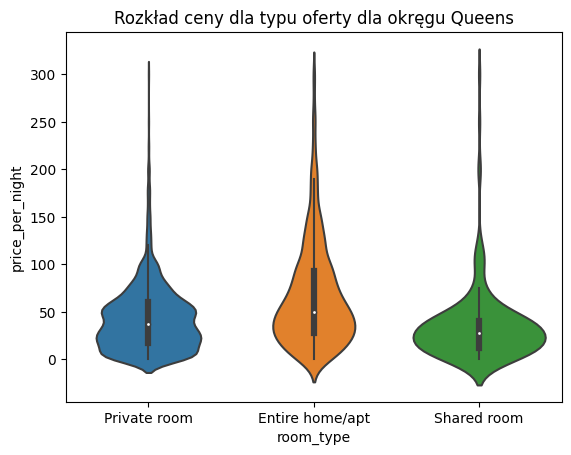

In [67]:
sub=n_df_Queens[n_df_Queens.price_per_night <= 300]
viol=sns.violinplot(data=sub, x='room_type', y='price_per_night').set(title="Rozkład ceny dla typu oferty dla okręgu Queens")

In [68]:
#room Type
sub_1=n_df_Queens.loc[n_df_Queens['room_type'] == 'Private room']
price_per_night_sub1=sub_1[['price_per_night']]

sub_1=n_df_Queens.loc[n_df_Queens['room_type'] == 'Entire home/apt']
price_per_night_sub1=sub_1[['price_per_night']]

sub_1=n_df_Queens.loc[n_df_Queens['room_type'] == 'Shared room']
price_per_night_sub1=sub_1[['price_per_night']]


price_per_night_list_by_n=[price_per_night_sub1, price_per_night_sub2, price_per_night_sub3]

In [69]:
data_table=[]
name_list=['Private room', 'Entire home/apt', 'Shared room']

for x in price_per_night_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Queens'}, inplace=True)
    data_table.append(i)
    

#Zmiana nazw w celu łatwiejszego odczytania nazw okręgów 
   
for i in range(3):
    data_table[i].rename(columns={'price_per_night':name_list[i]}, inplace=True)  
data_table=[df.set_index('Queens') for df in data_table]
data_table=data_table[0].join(data_table[1:])
data_table

,Private room,Entire home/apt,Shared room
Queens,,,
min,0.0,0.0,0.0
25%,12.0,20.0,21.0
50%,28.5,50.0,43.0
75%,41.0,100.0,70.0
max,1250.0,7703.0,2000.0


### Staten Island

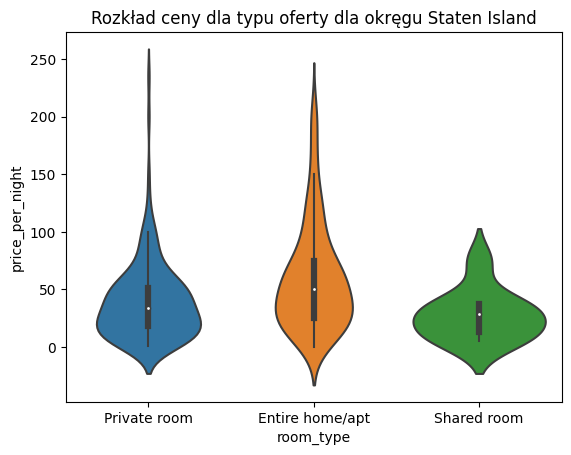

In [70]:
sub=n_df_Staten_Island[n_df_Staten_Island.price_per_night <= 250]
viol=sns.violinplot(data=sub, x='room_type', y='price_per_night').set(title="Rozkład ceny dla typu oferty dla okręgu Staten Island")

In [71]:
#room Type
sub_1=n_df_Staten_Island.loc[n_df_Staten_Island['room_type'] == 'Private room']
price_per_night_sub1=sub_1[['price_per_night']]

sub_1=n_df_Staten_Island.loc[n_df_Staten_Island['room_type'] == 'Entire home/apt']
price_per_night_sub1=sub_1[['price_per_night']]

sub_1=n_df_Staten_Island.loc[n_df_Staten_Island['room_type'] == 'Shared room']
price_per_night_sub1=sub_1[['price_per_night']]


price_per_night_list_by_n=[price_per_night_sub1, price_per_night_sub2, price_per_night_sub3]

In [72]:
data_table=[]
name_list=['Private room', 'Entire home/apt', 'Shared room']

for x in price_per_night_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Staten Island'}, inplace=True)
    data_table.append(i)
    

#Zmiana nazw w celu łatwiejszego odczytania nazw okręgów 
   
for i in range(3):
    data_table[i].rename(columns={'price_per_night':name_list[i]}, inplace=True)  
data_table=[df.set_index('Staten Island') for df in data_table]
data_table=data_table[0].join(data_table[1:])
data_table

,Private room,Entire home/apt,Shared room
Staten Island,,,
min,5.0,0.0,0.0
25%,13.0,20.0,21.0
50%,29.0,50.0,43.0
75%,37.0,100.0,70.0
max,75.0,7703.0,2000.0


### Bronx

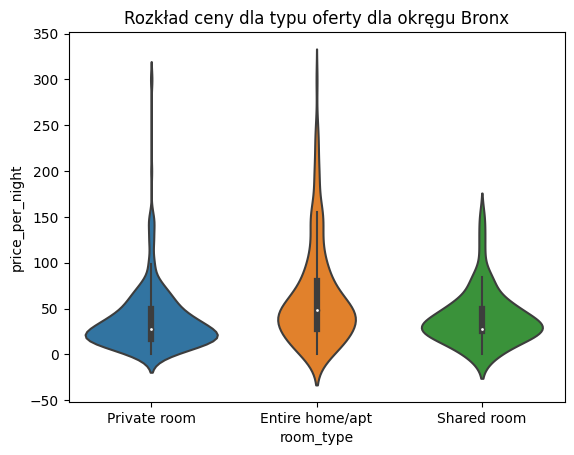

In [73]:
sub=n_df_Bronx[n_df_Bronx.price_per_night <= 300]
viol=sns.violinplot(data=sub, x='room_type', y='price_per_night').set(title="Rozkład ceny dla typu oferty dla okręgu Bronx")

In [74]:
#room Type
sub_1=n_df_Bronx.loc[n_df_Bronx['room_type'] == 'Private room']
price_per_night_sub1=sub_1[['price_per_night']]

sub_1=n_df_Bronx.loc[n_df_Bronx['room_type'] == 'Entire home/apt']
price_per_night_sub1=sub_1[['price_per_night']]

sub_1=n_df_Bronx.loc[n_df_Bronx['room_type'] == 'Shared room']
price_per_night_sub1=sub_1[['price_per_night']]


price_per_night_list_by_n=[price_per_night_sub1, price_per_night_sub2, price_per_night_sub3]

In [75]:
data_table=[]
name_list=['Private room', 'Entire home/apt', 'Shared room']

for x in price_per_night_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Bronx'}, inplace=True)
    data_table.append(i)
    

#Zmiana nazw w celu łatwiejszego odczytania nazw okręgów 
   
for i in range(3):
    data_table[i].rename(columns={'price_per_night':name_list[i]}, inplace=True)  
data_table=[df.set_index('Bronx') for df in data_table]
data_table=data_table[0].join(data_table[1:])
data_table

,Private room,Entire home/apt,Shared room
Bronx,,,
min,0.00,0.0,0.0
25%,26.00,20.0,21.0
50%,29.00,50.0,43.0
75%,51.25,100.0,70.0
max,400.00,7703.0,2000.0


### Opisy

!!! Znaleźć najbiedniejsze oraz najdroższe dzielnice w danym okręgu/ Konrad

!!! Średnie ceny danego typu pokoju dla poszczególnej dzielnicy, popatrzeć na odstające ceny i przebadać/ Konrad

Widzimy, że niektóre ogłoszenia nie wymagają inwestycji pieniężnej w celu znalezienia noclegu (przynajmniej jest to prawdą na Brooklynie, Manhattanie oraz Bronxie). 

Kolejne progi procentowe powoli pozwalają nam na określenie gdzie mieszkanie będzie bardziej lub mniej pożądane. Już przy 25% widzimy znaczną różnicę, gdzie na Manhattan'ie zapłacimy ponad dwukrotność mieszkania na Bronx'ie! Nie ma tutaj mowy o standardzie danego pokoju, dlatego też ciężko ocenić czy ta różnica wynika tylko i wyłącznie z umiejscowienia geograficznego. Na ten fakt z pewnością wpływa również to, że ogłoszeń na okręgach Queens, Staten Island oraz Bronx jest blisko 3-krotnie mniej sumarycznie niż na samym Manhattan'ie.

Kolejne progi tylko ugruntowują statystykę, że najdroższym miejscem do skorzystania z serwisu AirBnB jest Manhattan, następnie ze sporą różnicą uplasował się Brooklyn, później przy takich samych wynikach widzimy Queens oraz Staten Island, a Bronx pomimo swojego położenia stosunkowo blisko Manhattanu, okazał się najtańszy. 

Maksymalne ogłoszenie w każdym z okręgów uplasowało się znacznie wyżej niż pozostałe, ale ponownie widzimy tutaj znacznie niższą cenę na Bronx'ie, co tylko utwierdza wcześniej wysunięty wniosek.

## Mapa Nowego Jorku

Na mapie Nowego Jorku zostały narzucone koordynaty wszystkich obiektów dostępnych na wynajem z naszej bazy danych. Przedstawione zostały w formie mapy cieplnej, która charakteryzuje się co raz to intensywniejszym kolorem w zależności od ilości mieszkań w tej okolicy. 

Wnioski z tej mapy pokrywają się w wizualny sposób z poprzednimi badaniami. Widzimy tutaj, że na Staten Island ilość mieszkań jest bardzo mała, a większość z nich jest umiejscowiona niedaleko mostu łączącego ją z Brooklyn'em. Podobną charakterystyką można opisać Bronx oraz Queens, chociaż w tych przypadkach odległość dzieląca mieszkania jest większa, ponieważ nie są tak scentralizowane jak na Staten Island. 

Drugą pod względem ilości dostępnych na wynajem mieszkań jest Brooklyn. Widzimy tutaj znacznie większe zagęszczenie w porównaniu do poprzednich okręgów. Ilość mieszkań rośnie odwrotnie proporcjonalnie do odległości od Manhattanu, gdzie pomimo mniejszej powierzchni od pozostałych hrabstw, widzimy czerwone punkty na mapie oraz nieprzerwaną falę pomarańczowego koloru na około central parku. Zgadza się to z założeniem, że manhattan jest najsławniejszym oraz najbogatszym okręgiem z badanych, dlatego też ludzie z pewnością są bardziej skłonni właśnie tam pozostać na noc.

!!! Dostosować kolory na mapie/ Paweł

In [76]:
map = folium.Map([40.7128,-74.0060],zoom_start=11)
folium.plugins.HeatMap(df[['latitude','longitude']].dropna(),
                       radius=8, gradient={0.1:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map)
display(map)

In [77]:
room_type = le.fit_transform(df["room_type"])

df["neighbourhood"] = df["neighbourhood"].map(dzielnica_mapping)
df["neighbourhood_group"] = df["neighbourhood_group"].map(hrabstwo_mapping)

In [78]:
x = list(
    zip(
        df["longitude"],
        df["latitude"],
        df["neighbourhood"],
        df["neighbourhood_group"],
        df["minimum_nights"],
        room_type,
    )
)

y = list(df["price_per_night"])

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.1)

model = KNeighborsClassifier(n_neighbors=31)
model.fit(x_train, y_train)
accuracy = model.score(x_test, y_test)
print(f"Dokładna predykcja ceny: {accuracy*100:.2f}%")
predicted = model.predict(x_test) # y testowy

kolumny = "longitude;latitude;neigbourhood;neighbourhood_group;minimum_nights;room_type".split(";")

dane_tren = pd.DataFrame(x_test,y_test, columns = kolumny)
dane_predicted = pd.DataFrame(x_test,predicted, columns = kolumny)
accurate = []
not_accurate = []
inaccuracy = 10
for x in range(len(predicted)):
    if predicted[x] in range(y_test[x] - inaccuracy, y_test[x] + inaccuracy + 1):
        accurate.append(x_test[x])
    else:
        not_accurate.append(x_test[x])
    # print("Data: ", x_test[x], "Predicted: ", predicted[x],  "Actual: ", y_test[x])
print(f"Precyzja wynosi około {len(accurate)*100/(len(accurate) + len(not_accurate)):.2f}% jeśli weźmiemy pod uwagę niepewność równą ${inaccuracy}.")

Dokładna predykcja ceny: 10.27%
Precyzja wynosi około 50.16% jeśli weźmiemy pod uwagę niepewność równą $10.
